In [4]:
import json
import functools
import nltk
from collections import Counter

# nltk.download()
# Download Corpora -> brown webtext words stopwords
# Download Models -> punkt averaged_perceptron_tagger maxent_ne_chunker vader_lexicon wordnet tagsets
nltk.download(["brown","webtext", "words", "stopwords"] )
nltk.download(["punkt", "averaged_perceptron_tagger", "maxent_ne_chunker", "vader_lexicon", "wordnet", "tagsets", "omw-1.4"])

[nltk_data] Downloading package brown to /Users/martas/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package webtext to /Users/martas/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package words to /Users/martas/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/martas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/martas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/martas/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloadin

True

In [5]:
with open('text.txt') as user_file:
  # for testing use just few sentences
  text = user_file.read()
  #text = user_file.read()

text

'It’s a gloomy April afternoon in rural Oklahoma, and I’m sitting on the floor of a fluorescent-lit room at a roadside zoo with Nova, a 12-week-old tiliger. She looks like a tiger cub, but she’s actually a crossbreed, an unnatural combination of a tiger father and a mother born of a tiger and a lion. That unique genetic makeup places a higher price tag on cubs like Nova, and makes it easier, legally speaking, to abuse and exploit them. Endangered species protections don’t apply to artificial breeds such as tiligers. Hybridization, however, has done nothing to quell Nova’s predatory instincts. For the umpteenth time during the past six minutes, she lunges at my face, claws splayed and mouth ajar — only to be halted mid-leap as her handler jerks her harness. Unphased, Nova gets right back to pouncing.\n\nWith her dusty blue eyes, sherbet-colored paws, and prominent black stripes, Nova is adorable. But she also weighs 30 pounds and has teeth like a Doberman’s and claws the size of jumbo s

### Tokenise

In [6]:
tokens = nltk.word_tokenize(text)
print(tokens)

['It', '’', 's', 'a', 'gloomy', 'April', 'afternoon', 'in', 'rural', 'Oklahoma', ',', 'and', 'I', '’', 'm', 'sitting', 'on', 'the', 'floor', 'of', 'a', 'fluorescent-lit', 'room', 'at', 'a', 'roadside', 'zoo', 'with', 'Nova', ',', 'a', '12-week-old', 'tiliger', '.', 'She', 'looks', 'like', 'a', 'tiger', 'cub', ',', 'but', 'she', '’', 's', 'actually', 'a', 'crossbreed', ',', 'an', 'unnatural', 'combination', 'of', 'a', 'tiger', 'father', 'and', 'a', 'mother', 'born', 'of', 'a', 'tiger', 'and', 'a', 'lion', '.', 'That', 'unique', 'genetic', 'makeup', 'places', 'a', 'higher', 'price', 'tag', 'on', 'cubs', 'like', 'Nova', ',', 'and', 'makes', 'it', 'easier', ',', 'legally', 'speaking', ',', 'to', 'abuse', 'and', 'exploit', 'them', '.', 'Endangered', 'species', 'protections', 'don', '’', 't', 'apply', 'to', 'artificial', 'breeds', 'such', 'as', 'tiligers', '.', 'Hybridization', ',', 'however', ',', 'has', 'done', 'nothing', 'to', 'quell', 'Nova', '’', 's', 'predatory', 'instincts', '.', 'For

### Token frequency

In [7]:
c = Counter(tokens)
print(c.most_common()[:20])

[(',', 645), ('.', 430), ('the', 379), ('a', 286), ('to', 263), ('and', 260), ('’', 209), ('of', 187), ('in', 172), ('s', 114), ('her', 109), ('“', 103), ('”', 103), ('for', 88), ('was', 87), ('that', 81), ('Joe', 80), ('Breonna', 68), ('I', 66), ('on', 66)]


In [8]:
# Stemming and Lemmanization
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokens = nltk.word_tokenize(text)
stems = {token:stemmer.stem(token) for token in tokens}
stems

from nltk.corpus.reader.wordnet import NOUN,VERB
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
tokens = nltk.word_tokenize(text)
lemmas = {token:lemmatizer.lemmatize(token, pos=VERB) for token in tokens}
print(lemmas)

{'It': 'It', '’': '’', 's': 's', 'a': 'a', 'gloomy': 'gloomy', 'April': 'April', 'afternoon': 'afternoon', 'in': 'in', 'rural': 'rural', 'Oklahoma': 'Oklahoma', ',': ',', 'and': 'and', 'I': 'I', 'm': 'm', 'sitting': 'sit', 'on': 'on', 'the': 'the', 'floor': 'floor', 'of': 'of', 'fluorescent-lit': 'fluorescent-lit', 'room': 'room', 'at': 'at', 'roadside': 'roadside', 'zoo': 'zoo', 'with': 'with', 'Nova': 'Nova', '12-week-old': '12-week-old', 'tiliger': 'tiliger', '.': '.', 'She': 'She', 'looks': 'look', 'like': 'like', 'tiger': 'tiger', 'cub': 'cub', 'but': 'but', 'she': 'she', 'actually': 'actually', 'crossbreed': 'crossbreed', 'an': 'an', 'unnatural': 'unnatural', 'combination': 'combination', 'father': 'father', 'mother': 'mother', 'born': 'bear', 'lion': 'lion', 'That': 'That', 'unique': 'unique', 'genetic': 'genetic', 'makeup': 'makeup', 'places': 'place', 'higher': 'higher', 'price': 'price', 'tag': 'tag', 'cubs': 'cub', 'makes': 'make', 'it': 'it', 'easier': 'easier', 'legally': 

### Stop words and punctuation

In [9]:
from string import punctuation
from nltk.corpus import stopwords

stops = stopwords.words('english')
tokens = nltk.word_tokenize(text)
filtered_tokens = [token for token in tokens if token not in stops]
nopunc_tokens = [token for token in filtered_tokens if token not in punctuation]
#nopunc_tokens

#### Part-Of-Speech Tagging

In [10]:
# get help for specific tag
nltk.help.upenn_tagset('VBD')

VBD: verb, past tense
    dipped pleaded swiped regummed soaked tidied convened halted registered
    cushioned exacted snubbed strode aimed adopted belied figgered
    speculated wore appreciated contemplated ...


In [11]:
sentences = nltk.sent_tokenize(text)
tokens = [nltk.word_tokenize(sent) for sent in sentences]
tagged = [nltk.pos_tag(sent) for sent in tokens]

print(tagged)

[[('It', 'PRP'), ('’', 'VBZ'), ('s', 'VBZ'), ('a', 'DT'), ('gloomy', 'JJ'), ('April', 'NNP'), ('afternoon', 'NN'), ('in', 'IN'), ('rural', 'JJ'), ('Oklahoma', 'NNP'), (',', ','), ('and', 'CC'), ('I', 'PRP'), ('’', 'VBP'), ('m', 'JJ'), ('sitting', 'VBG'), ('on', 'IN'), ('the', 'DT'), ('floor', 'NN'), ('of', 'IN'), ('a', 'DT'), ('fluorescent-lit', 'JJ'), ('room', 'NN'), ('at', 'IN'), ('a', 'DT'), ('roadside', 'NN'), ('zoo', 'NN'), ('with', 'IN'), ('Nova', 'NNP'), (',', ','), ('a', 'DT'), ('12-week-old', 'JJ'), ('tiliger', 'NN'), ('.', '.')], [('She', 'PRP'), ('looks', 'VBZ'), ('like', 'IN'), ('a', 'DT'), ('tiger', 'NN'), ('cub', 'NN'), (',', ','), ('but', 'CC'), ('she', 'PRP'), ('’', 'VBD'), ('s', 'PRP'), ('actually', 'RB'), ('a', 'DT'), ('crossbreed', 'NN'), (',', ','), ('an', 'DT'), ('unnatural', 'JJ'), ('combination', 'NN'), ('of', 'IN'), ('a', 'DT'), ('tiger', 'NN'), ('father', 'NN'), ('and', 'CC'), ('a', 'DT'), ('mother', 'NN'), ('born', 'NN'), ('of', 'IN'), ('a', 'DT'), ('tiger', '

### Named Entity Recognition

In [12]:
tokens = nltk.word_tokenize(text)
tagged = nltk.pos_tag(tokens)

ne_chunked = nltk.ne_chunk(tagged, binary=True)

def extractEntities(ne_chunked):
    data = {}
    for entity in ne_chunked:
        if isinstance(entity, nltk.tree.Tree):
            text = " ".join([word for word, tag in entity.leaves()])
            ent = entity.label()
            data[text] = ent
        else:
            continue
    return data

extracted_ne = list(extractEntities(ne_chunked).items())
extracted_ne_top10 = extracted_ne[0:10]
extracted_ne_top10

[('Nova', 'NE'),
 ('Doberman', 'NE'),
 ('South Dakota', 'NE'),
 ('Nooooo', 'NE'),
 ('Graham Lee Brewer', 'NE'),
 ('Lee Brewer', 'NE'),
 ('China', 'NE'),
 ('Laos', 'NE'),
 ('Vietnam', 'NE'),
 ('India', 'NE')]

#### Custom NER

In [13]:
def custom_ne(entities):
    data = {}
    entity = []
    
    for word, tag in entities:
        # match noun or (preposition or conjunction)
        # I played around with adding or tag.startswith("JJ") to include adjectives, but it was giving too many false positive
        if tag.startswith("NN") or (entity and tag.startswith("IN")):
            entity.append((word, tag))
        else:
            # drop preposition if it is at end
            if entity and entity[-1][1].startswith("IN"):
                entity.pop()
            # Select only entries starting with capital letter
            if entity and entity[0][0][0].isupper():
                data[" ".join(e[0] for e in entity)] = "NE"
            entity = []
    return data

custom_ne_top10 = list(custom_ne(tagged).items())[0:10]
custom_ne_top10

[('April afternoon', 'NE'),
 ('Oklahoma', 'NE'),
 ('Hybridization', 'NE'),
 ('Nova ’', 'NE'),
 ('Nova', 'NE'),
 ('Doberman ’ s', 'NE'),
 ('Nova ’ s handler', 'NE'),
 ('IT job', 'NE'),
 ('South Dakota bank', 'NE'),
 ('Graham Lee Brewer', 'NE')]

### Use pre-trained model for NER + clasiffication

In [14]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

ner_results = nlp(text)

In [15]:
# Model seems to do some weirds things - it splits "Doberman" into two entities "Do" and "##berman"
for result in ner_results[0:10]: 
    print(result["word"], result["score"], result["entity"], result)

Oklahoma 0.9995678 B-LOC {'entity': 'B-LOC', 'score': 0.9995678, 'index': 12, 'word': 'Oklahoma', 'start': 39, 'end': 47}
Nova 0.9934517 B-PER {'entity': 'B-PER', 'score': 0.9934517, 'index': 34, 'word': 'Nova', 'start': 127, 'end': 131}
Nova 0.9865797 B-PER {'entity': 'B-PER', 'score': 0.9865797, 'index': 94, 'word': 'Nova', 'start': 367, 'end': 371}
Nova 0.981709 B-PER {'entity': 'B-PER', 'score': 0.981709, 'index': 140, 'word': 'Nova', 'start': 571, 'end': 575}
Nova 0.98771554 B-PER {'entity': 'B-PER', 'score': 0.98771554, 'index': 194, 'word': 'Nova', 'start': 776, 'end': 780}
Nova 0.9832265 B-PER {'entity': 'B-PER', 'score': 0.9832265, 'index': 222, 'word': 'Nova', 'start': 888, 'end': 892}
Do 0.9379319 B-MISC {'entity': 'B-MISC', 'score': 0.9379319, 'index': 237, 'word': 'Do', 'start': 957, 'end': 959}
##berman 0.48699105 I-MISC {'entity': 'I-MISC', 'score': 0.48699105, 'index': 238, 'word': '##berman', 'start': 959, 'end': 965}
Nova 0.9704023 B-PER {'entity': 'B-PER', 'score': 0

### Wikipedia metadata

In [16]:
import wikipedia
from Levenshtein import distance

# Supress parser warnning
import warnings
warnings.catch_warnings()
warnings.simplefilter("ignore")


### There is some weird bug with Wikipedia package
It is cutting last character from parameter passed to wikipedia.summary(parameter) - maybe it is some compatibility issue with MacOS

In [17]:
display(wikipedia.page("Wikipedia").summary)
display(wikipedia.page("WikipediaX").summary)

"The Wikimedia Foundation, Inc. (WMF), is an American 501(c)(3) nonprofit organization headquartered in San Francisco, California, and registered as a charitable foundation under local laws. Best known as the hosting platform for Wikipedia, a crowdsourced online encyclopedia, it also hosts other related projects and MediaWiki, a wiki software.The Wikimedia Foundation was established in 2003 in St. Petersburg, Florida, by Jimmy Wales as a nonprofit way to fund Wikipedia, Wiktionary, and other crowdsourced wiki projects that had until then been hosted by Bomis, Wales's for-profit company. The Foundation finances itself mainly through millions of small donations from Wikipedia readers, collected through email campaigns and annual fundraising banners placed on Wikipedia and its sister projects. These are complemented by grants from philanthropic organizations and tech companies, and starting in 2022, by services income from Wikimedia Enterprise.\nThe Foundation has grown rapidly throughout

'Wikipedia is a multilingual free online encyclopedia written and maintained by a community of volunteers, known as Wikipedians, through open collaboration and using a wiki-based editing system called MediaWiki. Wikipedia is the largest and most-read reference work in history. It is consistently one of the 10 most popular websites ranked by Similarweb and formerly Alexa; as of 2023, Wikipedia was ranked the 5th most popular site in the world. It is hosted by the Wikimedia Foundation, an American non-profit organization funded mainly through donations.\nWikipedia was launched by Jimmy Wales and Larry Sanger on January 15, 2001. Sanger coined its name as a blend of wiki and encyclopedia. Wales was influenced by the "spontaneous order" ideas associated with Friedrich Hayek and the Austrian School of economics after being exposed to these ideas by the libertarian economist Mark Thornton. Initially available only in English, versions in other languages were quickly developed. Its combined e

## Creating regex to match noun phrase

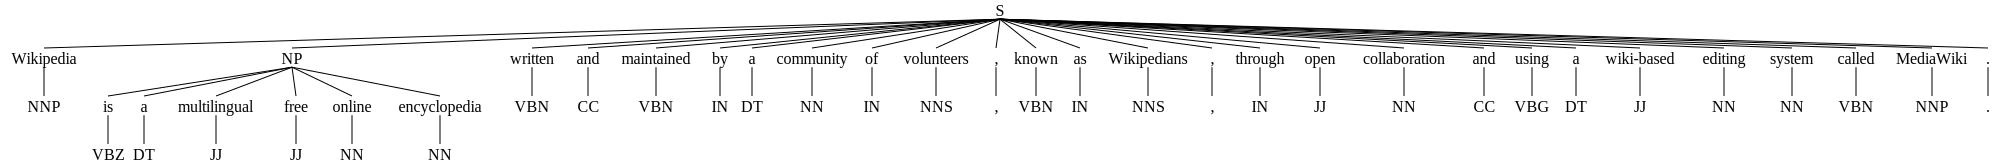

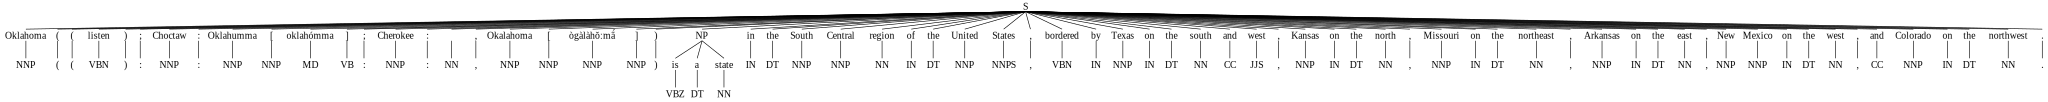

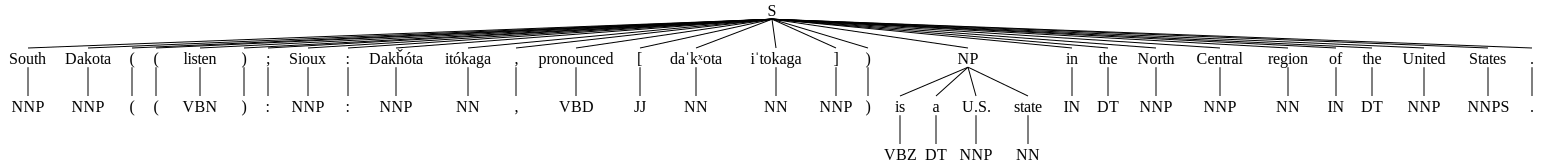

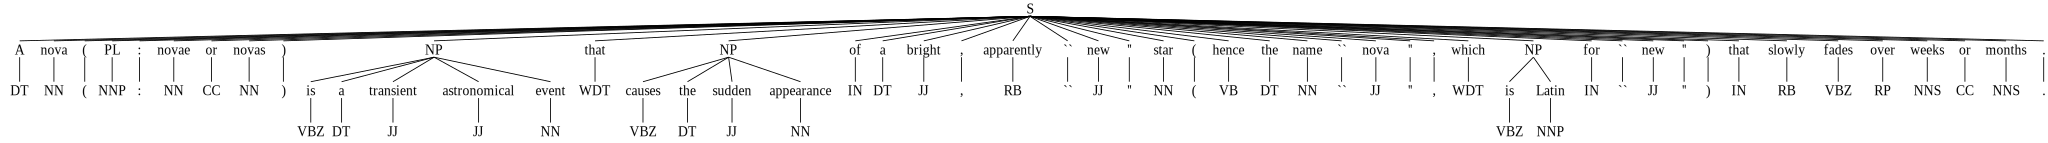

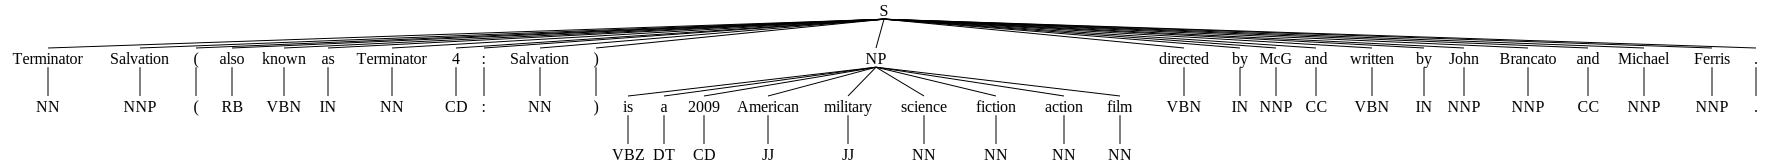

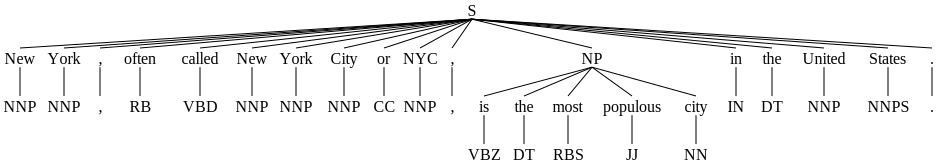

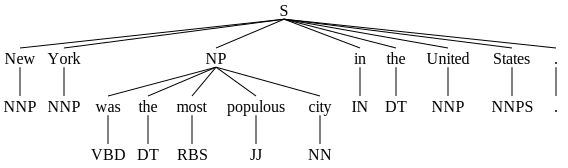

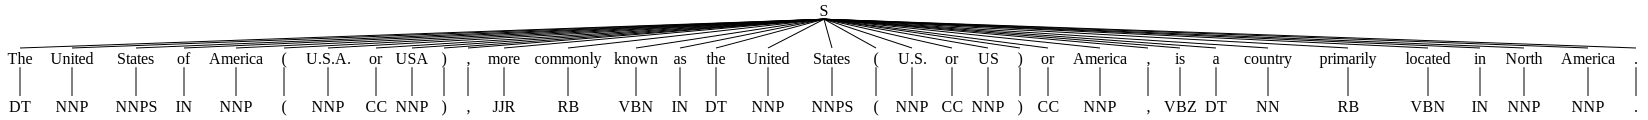

In [39]:
#NP = "NP: {<JJ>+(<V\w+>|<NN\w?>)+.*<NN\w?>}"
NP = "NP: {(<VBZ><DT>?)<RB\w?>?(<JJ>|<V\w+>|<CD>|<NN\w?>)*<NN\w?>}"
NP_PAST = "NP: {(<VBD><DT>?)<RB\w?>?(<JJ>|<V\w+>|<CD>|<NN\w?>)*<NN\w?>}"
chunker = nltk.RegexpParser(NP)
chunker2 = nltk.RegexpParser(NP_PAST)

def extract_noun_phrases(text, parser = chunker.parse):
    chunked = parser(nltk.pos_tag(nltk.word_tokenize(text)))
    continuous_chunk = []
    current_chunk = []

    for subtree in chunked:
        if isinstance(subtree, nltk.tree.Tree):
            current_chunk.append(" ".join([token for token, pos in subtree.leaves() if not pos.startswith("VB") and pos != "DT"]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            # Do not insert duplicities
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue

    # Try it again with looking verb, past tense
    if continuous_chunk == [] and parser == chunker.parse:
        return extract_noun_phrases(text, chunker2.parse)
    
    return continuous_chunk

display(chunker.parse(nltk.pos_tag(nltk.word_tokenize("Wikipedia is a multilingual free online encyclopedia written and maintained by a community of volunteers, known as Wikipedians, through open collaboration and using a wiki-based editing system called MediaWiki."))))
display(chunker.parse(nltk.pos_tag(nltk.word_tokenize("Oklahoma ( (listen); Choctaw: Oklahumma [oklahómma]; Cherokee: ᎣᎧᎳᎰᎹ, Okalahoma [ògàlàhǒːmã́]) is a state in the South Central region of the United States, bordered by Texas on the south and west, Kansas on the north, Missouri on the northeast, Arkansas on the east, New Mexico on the west, and Colorado on the northwest."))))
display(chunker.parse(nltk.pos_tag(nltk.word_tokenize("South Dakota ( (listen); Sioux: Dakȟóta itókaga, pronounced [daˈkˣota iˈtokaga]) is a U.S. state in the North Central region of the United States."))))
display(chunker.parse(nltk.pos_tag(nltk.word_tokenize('A nova (PL: novae or novas) is a transient astronomical event that causes the sudden appearance of a bright, apparently "new" star (hence the name "nova", which is Latin for "new") that slowly fades over weeks or months.'))))
display(chunker.parse(nltk.pos_tag(nltk.word_tokenize('Terminator Salvation (also known as Terminator 4: Salvation) is a 2009 American military science fiction action film directed by McG and written by John Brancato and Michael Ferris.'))))
display(chunker.parse(nltk.pos_tag(nltk.word_tokenize('New York, often called New York City or NYC, is the most populous city in the United States.'))))
display(chunker2.parse(nltk.pos_tag(nltk.word_tokenize('New York was the most populous city in the United States.'))))
display(chunker2.parse(nltk.pos_tag(nltk.word_tokenize('The United States of America (U.S.A. or USA), more commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.'))))


In [41]:
default_classification = "Unknown"

def classify(entity):
    search_result = wikipedia.search(f"{entity}")

    # distance does not work, but I want this still to work e.g. "America" -> "United States"
    #if search_result and distance(entity, search_result[0]) < 3:
    if search_result:
        try:
            # Try second search result - in some cases search is returning too general result which does not match any site -> just trying second
            try:
                summary = wikipedia.summary(f"{search_result[0]}a")
            except:
                if len(search_result) > 1:
                    summary = wikipedia.summary(f"{search_result[1]}a")
        except:
            return default_classification
        
        sentence = nltk.sent_tokenize(summary)[0]
        result = extract_noun_phrases(sentence)

        return result[0] if len(result) > 0 else default_classification
    else:
        return default_classification

print("Entity    :     Category\n")
for entity, _ in extracted_ne[0:38]:
#for entity, _ in [("America", 1)]:
    classification = classify(entity)
    print(f"{entity}: {classification}")

Entity    :     Category

Nova: transient astronomical event
Doberman: medium-large breed
South Dakota: U.S. state
Nooooo: 2009 American military science fiction action film
Graham Lee Brewer: Unknown
Lee Brewer: American former figure skater
China: country
Laos: socialist state
Vietnam: country
India: country
United States: country
U.S.: country
America: country
Washington Post: march
New York: most populous city
Joe: American politician
Wynnewood: Unknown
Oklahoma: state
Michael Jackson: American singer
Oklahoma City: capital
Joseph Maldonado-Passage: American media personality
Florida: state
Carole Baskin: Unknown
Baskin: American multinational chain
American: country
Carney Anne Nasser: Unknown
Michigan State University College: Unknown
Bengal: [ ˈpoʃtʃim ˈbɔŋɡo ]
Big Cat Rescue: Unknown
Tampa: city
Matias J.: 10th letter
AP: American not-for-profit news agency
New York City: most populous city
Joe Exotic: American media personality
Justin Bieber: Canadian singer
PETA: American ani